<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/imnarae/product_basic_rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings(action='ignore')

# click_stream_df

In [ ]:
click_df = pd.read_csv('C:/Users/lovel/Desktop/tp2/tp2-da/click_stream_final.csv')
#컬럼명 공백제거
click_df.columns = click_df.columns.str.strip()
click_df.head(1)

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0


In [ ]:
print(click_df.info())
print('--------------------------------------------------')
print(click_df['session_id'].describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ GB
None
--------------------------------------------------
count                                 12833602
unique                                  895203
top       65383bfb-5535-445f-ab52-aec4658eb0bd
freq                                       650
Name: session_id, dtype: object


# customer_df

In [ ]:
customer_df = pd.read_csv('C:/Users/lovel/Desktop/tp2/tp2-da/tp2_imnarae/customer_add_rfm.csv')
customer_df.head(1)

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,age_segment,RFM_Segment
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,Late 20s(26-30),NaN


In [ ]:
print(customer_df.info())
print('--------------------------------------------------')
print('customer_id.nunique :', customer_df['customer_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      99999 non-null  int64 
 1   gender           99999 non-null  object
 2   birthdate        99999 non-null  object
 3   home_location    99999 non-null  object
 4   first_join_date  99999 non-null  object
 5   age_join         99999 non-null  int64 
 6   age_now          99999 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB
None
--------------------------------------------------
customer_id.nunique : 99999


# transaction_df

In [ ]:
transaction_df = pd.read_csv('C:/Users/lovel/Desktop/tp2/tp2-da/transaction_final.csv')
transaction_df.sort_values(by=['customer_id', 'created_at'], inplace=True)
transaction_df.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
352123,2018-08-25 18:54:03.844494+00:00,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,1,8073,6.00,0,826597,56019,5,166934,1


## sales_df

In [ ]:
# customer_id, booking_id 별 total_amount와 shipment_fee 차이
sales = pd.DataFrame(transaction_df.groupby(['customer_id', 'booking_id']).total_amount.unique() - transaction_df.groupby(['customer_id', 'booking_id']).shipment_fee.unique())
sales.head(1)

,,0
customer_id,booking_id,
3,0b3f17a4-f733-4eac-b9e9-37c039746e95,[174717]


In [ ]:
# 데이터프레임 재구조화
sales = sales.reset_index()

# 컬럼명 변경 (0->sales)
sales.rename(columns={0:'sales'}, inplace=True)

# sales 컬럼 형식 ([] -> int)
sales.sales = sales.sales.apply(lambda x:x[0])
sales.head()

,customer_id,booking_id,sales
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,174717
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,189939
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,287523
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,359032
4,3,182774df-3cde-46cf-b302-4d93e0d94288,200436


In [ ]:
sales.columns

Index(['customer_id', 'booking_id', 'sales'], dtype='object')

In [ ]:
print('booking_id.nunique :',transaction_df['booking_id'].nunique())
print('--------------------------------------------------')
print(transaction_df['payment_status'].value_counts())
print('--------------------------------------------------')
print(transaction_df['item_price'].describe().round(2))

booking_id.nunique : 852582
--------------------------------------------------
payment_status
1    1201028
0      53550
Name: count, dtype: int64
--------------------------------------------------
count   1254578.00
mean     249974.34
std      111873.52
min        5600.00
25%      168373.00
50%      233540.00
75%      313647.00
max     1200357.00
Name: item_price, dtype: float64


In [ ]:
#  'transaction_df','sales' 머지 (기준 : 'booking_id')
combined_df = pd.merge(sales, transaction_df[['booking_id', 'created_at']], on='booking_id')
combined_df.head(1)


,customer_id,booking_id,sales,created_at
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,174717,2020-05-31 05:45:52.844494+00:00


# product_df

In [ ]:
product_df = pd.read_csv('C:/Users/lovel/Desktop/tp2/tp2-da/product_final.csv')
product_df.head(1)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,brand
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,turtle


In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44424 non-null  int64 
 1   gender              44424 non-null  object
 2   masterCategory      44424 non-null  object
 3   subCategory         44424 non-null  object
 4   articleType         44424 non-null  object
 5   baseColour          44409 non-null  object
 6   season              44403 non-null  object
 7   usage               44107 non-null  object
 8   productDisplayName  44417 non-null  object
 9   brand               44417 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


In [ ]:
print(product_df['id'].value_counts())
print('--------------------------------------------------')
print(product_df['gender'].value_counts())



id
15970    1
36826    1
13953    1
6198     1
12881    1
        ..
8845     1
16466    1
22653    1
7031     1
51623    1
Name: count, Length: 44424, dtype: int64
--------------------------------------------------
gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64


In [ ]:
print(product_df.describe())
print('--------------------------------------------------')
print('결측치 확인 \n',product_df.isnull().sum())

            id
count 44424.00
mean  29696.33
std   17049.49
min    1163.00
25%   14768.75
50%   28618.50
75%   44683.25
max   60000.00
--------------------------------------------------
결측치 확인 
 id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
usage                 317
productDisplayName      7
brand                   7
dtype: int64


In [ ]:
# product_df['id'] =>  product_df[''product_id'] 컬럼명 변경
product_df.rename(columns={'id': 'product_id'}, inplace=True)

# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 상품 카테고리별 매출액 총합 .
category_sales = trans_prod_df.groupby(['masterCategory', 'subCategory'])['sales'].sum().reset_index()

trans_prod_df.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,...,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,brand,sales
0,2018-08-25 18:54:03.844494+00:00,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,1,8073,6.00,0,826597,...,Women,Personal Care,Lips,Lipstick,Brown,Spring,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...,colorbar,834670


In [ ]:
category_sales = category_sales.sort_values('subCategory',ascending=True)

In [ ]:
# 'created_at' 컬럼 datetime 형태로 변환
trans_prod_df['created_at'] = pd.to_datetime(trans_prod_df['created_at'])

# 월별 매출 확인을 위해 월별로 그룹화('created_at'에서 연도와 월만 추출)
trans_prod_df['month'] = trans_prod_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()
category_sales.head(1)

,month,masterCategory,subCategory,sales
0,2016-06,Apparel,Topwear,630795


In [ ]:
category_sales['subCategory'].value_counts()

subCategory
Socks                       136
Topwear                      74
Dress                        73
Skin                         73
Nails                        73
Makeup                       73
Lips                         73
Fragrance                    73
Accessories                  73
Shoes                        73
Sandal                       73
Flip Flops                   73
Saree                        73
Loungewear and Nightwear     73
Innerwear                    73
Free Gifts                   73
Bottomwear                   73
Headwear                     73
Watches                      73
Bags                         73
Cufflinks                    73
Eyewear                      73
Belts                        73
Jewellery                    73
Scarves                      73
Stoles                       73
Ties                         73
Wallets                      73
Skin Care                    72
Perfumes                     72
Apparel Set                 

In [ ]:
category_sales['month'] = category_sales['month'].dt.to_timestamp()

## 카테고리별 매출

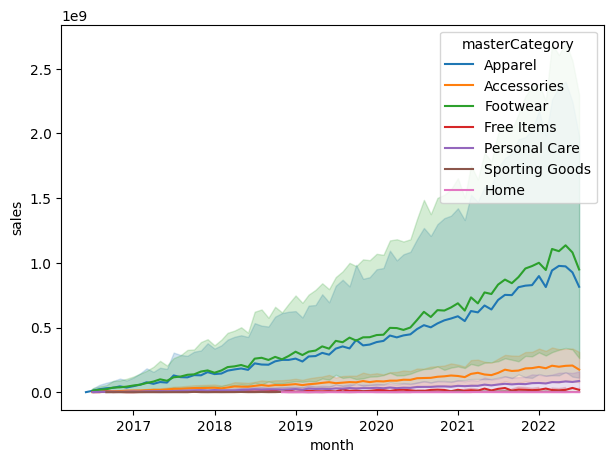

In [ ]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=category_sales, x='month', y='sales', hue='masterCategory')
plt.show()

In [ ]:
# seaborn의 'lineplot' : 기본적으로 각 데이터 포인트에 대한 신뢰 구간(confidence interval)이나 표준 편차를 나타내는 면이 생성됨
# 신뢰 구간(confidence interval): 일반적으로 데이터 내에서 통계적 변동성을 보여주는 범위(데이터가 여러 번 측정될 때마다 어느 정도의 변동이 있을 것으로 예상되는지)
# 표준 편차(standard deviation): 데이터 포인트들이 평균으로부터 얼마나 떨어져 있는지를 측정하는 통계치

# => 색칠된 영역 : 매월의 매출액이 얼마나 변동성을 가질 수 있는지(신뢰 구간 또는 표준 편차)
# => 이는 각 카테고리별 매출액이 시간에 따라 얼마나 일관성이 있거나 변동성이 있는지를 가늠하게 해줌

## 성별(제품군)에 따른 상품판매량 및 매출

In [ ]:
# 성별(제품군)에 따른 상품판매량 및 매출
product_df.rename(columns={'id': 'product_id'}, inplace=True)
# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 성별(제품군)에 따른 매출액 및 판매횟수 총합 .
gender_sales = trans_prod_df.groupby('gender').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
gender_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

gender_product_cnt = product_df['gender'].value_counts().reset_index()
gender_product_cnt.columns = ['gender', 'product_count']

# 'gender_sales' 데이터프레임에 'product_count'를 병합
gender_sales = pd.merge(gender_sales, gender_product_cnt, on='gender')
gender_sales

# 성별, 총 판매액, 총 판매 횟수, 등록된 제품 수

,gender,total_sales,sales_count,product_count
0,Boys,8708916491,23543,830
1,Girls,6635897551,18284,655
2,Men,230989573060,624726,22147
3,Unisex,22358639451,60513,2161
4,Women,193824062514,526893,18631


In [ ]:
## [성별(제품군)에 따른 상품판매량 및 매출] 분석결과

# 제품의 타겟 성별에 따른 상품판매량 및 매출
# 제품의 타겟 성별 종류와 등록 제품 수  : Girls < Boys < Unisex < Girls < Women < Men
# 제품의 타겟 성별에 따른 상품판매량 및 매출 : Girls < Boys < Unisex < Girls < Women < Men

# 추가 분석 예정 : Customer_id or age segment 별 가장 많이 사는 제품의 gender 는?
# 추가 분석 이유 : 어떤 고객이 어떤 성별군의 제품을 많이 사는지에 대한 분석을 통해 고객의 구매패턴 분석 가능
# 도출 가능한 인사이트 : 고객별 맞춤 item 광고 또는 추천 시스템 선정


In [ ]:
# 'customer_df'와 'trans_prod_df'를 성별 기준으로 병합
customer_gender_sales = pd.merge(customer_df, trans_prod_df, left_on='customer_id', right_on='customer_id')

# 성별(제품군)에 따른 매출액 및 판매횟수 총합
gender_sales = customer_gender_sales.groupby(['gender', 'gender']).agg({
    'sales': 'sum',
    'product_id': 'count'
}).reset_index()

gender_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

gender_product_cnt = product_df.groupby('gender').size().reset_index()
gender_product_cnt.columns = ['gender', 'product_count']

# 'gender_sales' 데이터프레임에 'product_count'를 병합
gender_sales = pd.merge(gender_sales, gender_product_cnt, on='gender')

print(gender_sales)




KeyError: 'gender'

## 계절(제품군)에 따른 상품판매량 및 매출

In [ ]:
# 계절(제품군)에 따른 매출액 및 판매횟수 총합 .
seaason_sales = trans_prod_df.groupby('season').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
seaason_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

season_product_cnt = product_df['season'].value_counts().reset_index()
season_product_cnt.columns = ['season', 'product_count']

# 'season_sales' 데이터프레임에 'product_count'를 병합
seaason_sales = pd.merge(seaason_sales, season_product_cnt, on='season')
seaason_sales['sales_per_product'] = (seaason_sales['total_sales'] / seaason_sales['product_count']).round(2)
seaason_sales['count_per_product'] = (seaason_sales['sales_count'] / seaason_sales['product_count']).round(2)
seaason_sales

# 계절, 총 판매액, 총 판매 횟수, 등록된 제품 수 , 등록제품 수 대비 총 판매액, 등록제품 수 대비 총 판매횟수

,season,total_sales,sales_count,product_count,sales_per_product,count_per_product
0,Fall,118837847931,321850,11431,10396102.52,28.16
1,Spring,30989330226,84304,2983,10388645.73,28.26
2,Summer,223756724277,606317,21472,10420860.85,28.24
3,Winter,88712809692,240885,8517,10415969.20,28.28


In [ ]:
## [계절(제품군)에 따른 상품판매량 및 매출]분석결과

# 제품의 타겟 계절에 따른 상품판매량 및 매출
# 제품의 타겟 계절 종류와 등록 제품 수  : spring < winter < fall <  summer
# 제품의 타겟 계절에 따른 상품판매량 및 매출 :spring < winter < fall <  summer
# 등록 제품 수 대비 전체 매출과 전체 구매횟수의 비율이 각 계절별 매우 유사

## trans_sales_df

In [ ]:
# transaction_df와 sales 결합(기준: booking_id)
trans_sales_df = pd.merge(transaction_df, sales, on='booking_id')

trans_sales_df.drop("customer_id_y", axis=1, inplace=True) # 중복 컬럼 삭제
trans_sales_df.rename(columns={'customer_id_x':'customer_id'}, inplace=True)


# 'created_at' 컬럼을 datetime 타입으로 변환
trans_sales_df['created_at'] = pd.to_datetime(trans_sales_df['created_at'])

# 연도와 월 컬럼을 생성
trans_sales_df['year'] = trans_sales_df['created_at'].dt.year
trans_sales_df['month'] = trans_sales_df['created_at'].dt.month

# 연도별 sales 평균
average_sales_yearly = trans_sales_df.groupby('year')['sales'].mean().reset_index()

# 월별 sales 평균
average_sales_monthly = trans_sales_df.groupby('month')['sales'].mean().reset_index()

print("Yearly average sales: \n", average_sales_yearly.round(2))
print("\nMonthly average sales: \n", average_sales_monthly.round(2))


Yearly average sales: 
    year      sales
0  2016 1212344.68
1  2017 1165714.25
2  2018 1188341.63
3  2019 1148596.09
4  2020 1183655.03
5  2021 1175288.06
6  2022 1166920.78

Monthly average sales: 
     month      sales
0       1 1140441.24
1       2 1175634.27
2       3 1177454.37
3       4 1186283.19
4       5 1188028.01
5       6 1185990.98
6       7 1157272.20
7       8 1187229.08
8       9 1175181.75
9      10 1168772.94
10     11 1148804.57
11     12 1175557.50


In [ ]:
trans_sales_df.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo,sales,year,month
0,2018-08-25 18:54:03.844494+00:00,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,1,8073,6.00,0,826597,56019,5,166934,1,826597,2018,8


## 연도별 구매 건 당 매출 평균

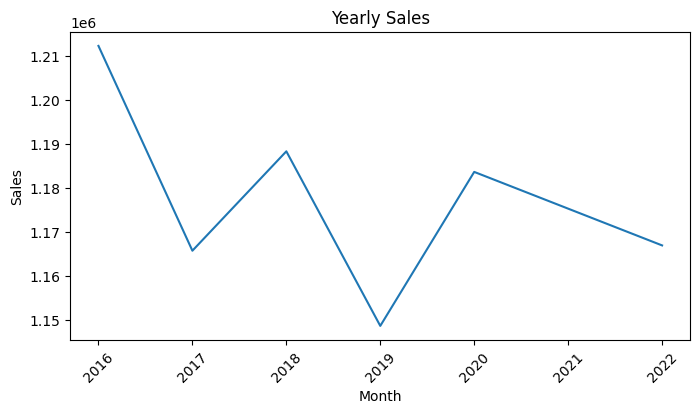

In [ ]:
# 연도별 매출 평균 그래프로 시각화
plt.figure(figsize=(8, 4))
plt.plot(average_sales_yearly['year'].astype(str), average_sales_yearly['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Yearly Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## [연도별 매출 평균]분석결과

# 19년까지 급격히 하락하다 20년(코로나) 이후 조금 회복되는 추세

## 월별 구매 건 당 매출 평균

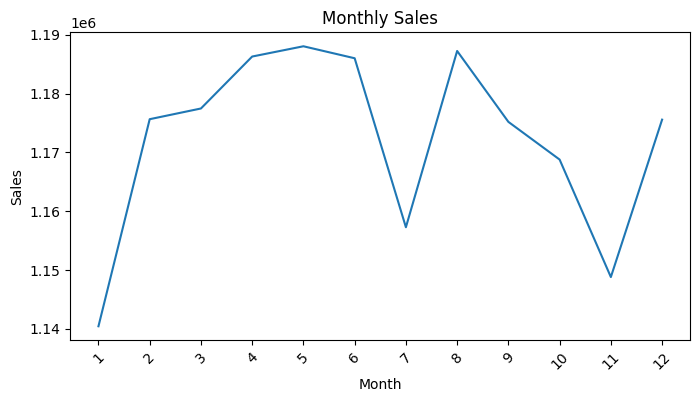

In [ ]:
# 월별 매출 구매 건 당 평균 그래프로 시각화
plt.figure(figsize=(8, 4))
plt.plot(average_sales_monthly['month'].astype(str), average_sales_monthly['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## [월별 구매 건 당 매출 평균]분석결과

# 7월, 11월 왜 급격히 하락? (checkpoint)

In [ ]:
# 연도별 sales 합계
total_sales_yearly = trans_sales_df.groupby('year')['sales'].sum().reset_index()

# 월별 sales 합계
total_sales_monthly = trans_sales_df.groupby('month')['sales'].sum().reset_index()

# 매년 매월 sales 합계
total_sales_year_month = trans_sales_df.groupby(['year', 'month'])['sales'].sum().reset_index()
# 'sales'에 대한 전월 대비 퍼센트 변화 계산
total_sales_year_month['sales_pct_change'] = total_sales_year_month['sales'].pct_change()
# 퍼센트를 백분율로 변환
total_sales_year_month['sales_pct_change'] = total_sales_year_month['sales_pct_change'] * 100


print("Yearly total sales: \n", total_sales_yearly.round(2))
print("\nMonthly total sales: \n", total_sales_monthly.round(2))
print("Yearly and monthly total sales: \n", total_sales_year_month.round(2))

Yearly total sales: 
    year         sales
0  2016    8533694195
1  2017   58485049718
2  2018  128090155528
3  2019  196952068691
4  2020  301811909947
5  2021  443577219318
6  2022  333393933330

Monthly total sales: 
     month         sales
0       1  119129351827
1       2  116665242504
2       3  132762690348
3       4  135371519901
4       5  141717485724
5       6  137302176233
6       7  140931451244
7       8  104501090507
8       9  103840234195
9      10  110759936238
10     11  110860789490
11     12  117002062516
Yearly and monthly total sales: 
     year  month        sales  sales_pct_change
0   2016      6       630795               NaN
1   2016      7    415930774          65837.55
2   2016      8   1348531375            224.22
3   2016      9   1341442791             -0.53
4   2016     10   2035741865             51.76
..   ...    ...          ...               ...
69  2022      3  49961322493             17.49
70  2022      4  50211094441              0.50
71  2022 

## 연도별 매출 합계

In [ ]:
total_sales_yearly.describe()

,year,sales
count,7.00,7.00
mean,2019.00,210120575818.14
std,2.16,157394742008.72
min,2016.00,8533694195.00
25%,2017.50,93287602623.00
50%,2019.00,196952068691.00
75%,2020.50,317602921638.50
max,2022.00,443577219318.00


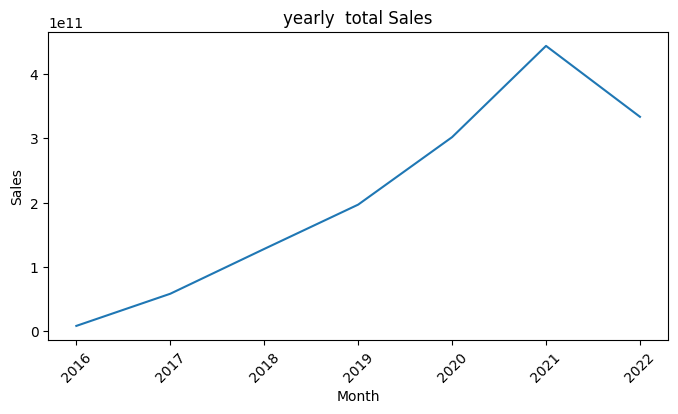

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(total_sales_yearly['year'].astype(str), total_sales_yearly['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('yearly  total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## [연도별 매출 합계]분석결과(check point)

# 연도별 총 매출은 꾸준히 상승하는 추세
# 그렇다면 이 회사는 잘 되고 있는 것일까?

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
total_sales_monthly['sales'].describe()

count             12.00
mean    122570335893.92
std      14206768386.35
min     103840234195.00
25%     110835576177.00
50%     118065707171.50
75%     135854183984.00
max     141717485724.00
Name: sales, dtype: float64

## 월별 매출 합계

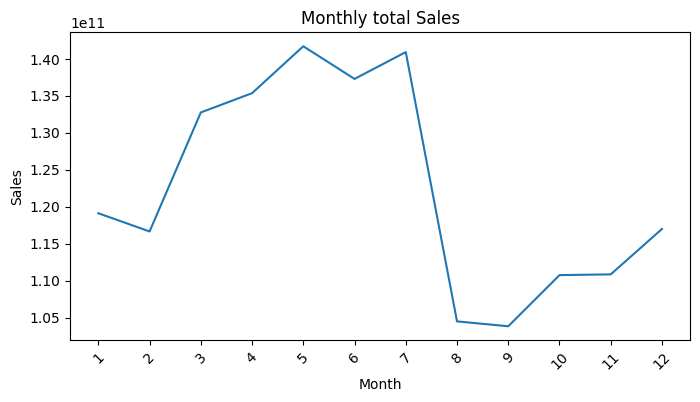

In [ ]:
# 월별 매출 합계 그래프로 시각화
plt.figure(figsize=(8, 4))
plt.plot(total_sales_monthly['month'].astype(str), total_sales_monthly['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## [월별 매출 합계]분석결과

# 8-9월 급격한 매출 하락
# 7월 르바란 매출 영향?

# # 인도네시아 르바란 기간
# 2016년 : 7/5 화 - 6 수
# 2017년 : 6/24 토 - 25 일(23~30일 공휴일)
# 2018년 : 6/14 목 - 16 토
# 2019년 : 6/5 수 - 6 목(4~6일 공휴일)
# 2020년 : 5/23 토 - 24 일
# 2021년 : 5/12 수 - 13 목(13~14일 공휴일)
# 2022년 : 5/1 일 - 2 월 (4/29 ~ 5/6 공휴일)

# 르바란 영향이 아닌데..
# 7월에 무슨일이 있었나? (check point)
# 연도에 따른 월별 매출 합계 구해보기!

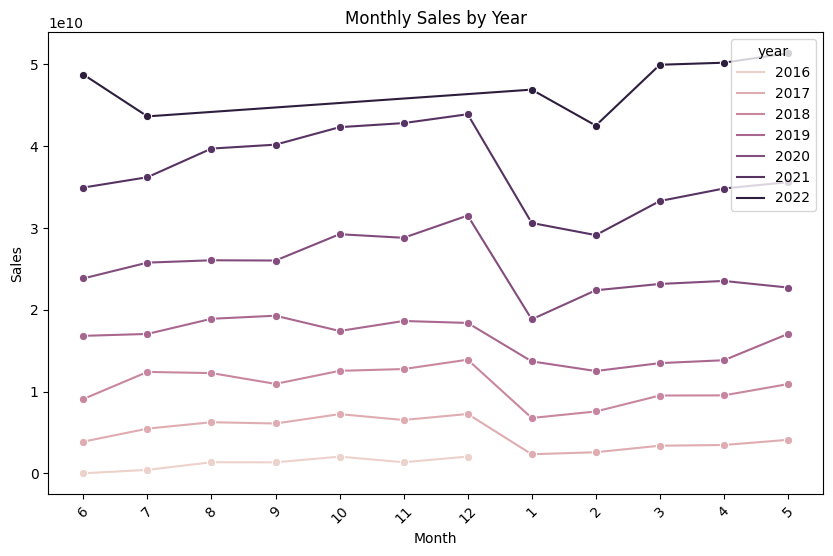

In [ ]:
# total_sales_year_month (연도에 따른 월별 매출 합계) 시각화

total_sales_year_month['month'] = total_sales_year_month['month'].astype(str)
#x축에 전체 월 표시하기 위해 month str타입으로 변경
#month 가 int인 경우, seaborn 자체적으로 짝수월만 프린트 해버릴 수 있음.

plt.figure(figsize=(10,6))
sns.lineplot(data=total_sales_year_month, x="month", y="sales", hue="year", marker='o') # 월 포인트에 점 찍기 (마커)
plt.title('Monthly Sales by Year') # 그래프 제목)
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
total_sales_year_month
# 연도, 월, 매출합계, 이전 월 대비 차이 %

,year,month,sales,sales_pct_change
0,2016,6,630795,NaN
1,2016,7,415930774,65837.55
2,2016,8,1348531375,224.22
3,2016,9,1341442791,-0.53
4,2016,10,2035741865,51.76
...,...,...,...,...
69,2022,3,49961322493,17.49
70,2022,4,50211094441,0.50
71,2022,5,51365659865,2.30
72,2022,6,48766614259,-5.06


In [ ]:
total_sales_year_month[(total_sales_year_month['year']=='2016')]

,year,month,sales,sales_pct_change


In [ ]:
# 2016년 : 7/5 화 - 6 수 : 증가
# 2017년 : 6/24 토 - 25 일(23~30일 공휴일)
# 2018년 : 6/14 목 - 16 토
# 2019년 : 6/5 수 - 6 목(4~6일 공휴일)
# 2020년 : 5/23 토 - 24 일
# 2021년 : 5/12 수 - 13 목(13~14일 공휴일)
# 2022년 : 5/1 일 - 2 월 (4/29 ~ 5/6 공휴일)

## 연도별 구입 건 수

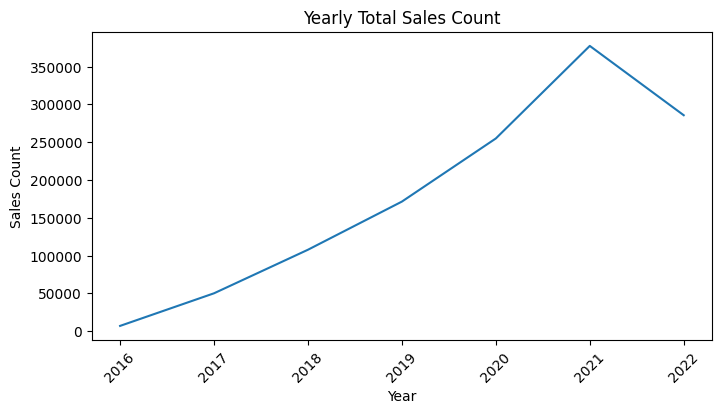

In [ ]:
#연도별 구입 건수
# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 연도별 총 구입 건수 계산
yearly_total_sales = transaction_df.groupby('year').size().reset_index()
yearly_total_sales.columns = ['year', 'sales_cnt']

# 그래프로 시각화
plt.figure(figsize=(8, 4))
plt.plot(yearly_total_sales['year'], yearly_total_sales['sales_cnt'])
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Yearly Total Sales Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## [연도별 구매 건 수]분석결과

# 계속해서 꾸준히 상승하는 추세 (22년에 감소한 것은 16년과 22년은 12개월 치 데이터가 없으니까? )

In [ ]:
## [연도별 매출 추세와 구매 건수] 종합 분석결과

# 연도별 매출 추세: 매출 평균이 연도에 따라 어떻게 변하는지를 파악 => 비즈니스 성장 트렌드 이해
# * 매출 평균 증가 추세 : 비즈니스의 성장을 나타냄
# * 매출 평균 감소 추세 : 고객 구매력의 감소 or 경쟁력 약화

# 판매 건수 변화:  비즈니스의 활동량
# * 판매 건수 증가 추세 : 고객 수 증가 or 기존 고객의 구매 빈도 증가
# => 제품이나 서비스에 대한 고객의 관심이 증가하고 있음을 보여주는 좋은 지표

# 매출과 판매 건수의 관계 분석:
# * 판매 건수는 증가하지만 매출 평균이 감소하는 추세 : 고객은 더 자주 구매하지만 더 저렴한 상품을 선택하고 있을 가능성
# => 가격경쟁력 향상을 위한 액션아이템 필요

## 연도에 따른 월별 구매 건 수 합계

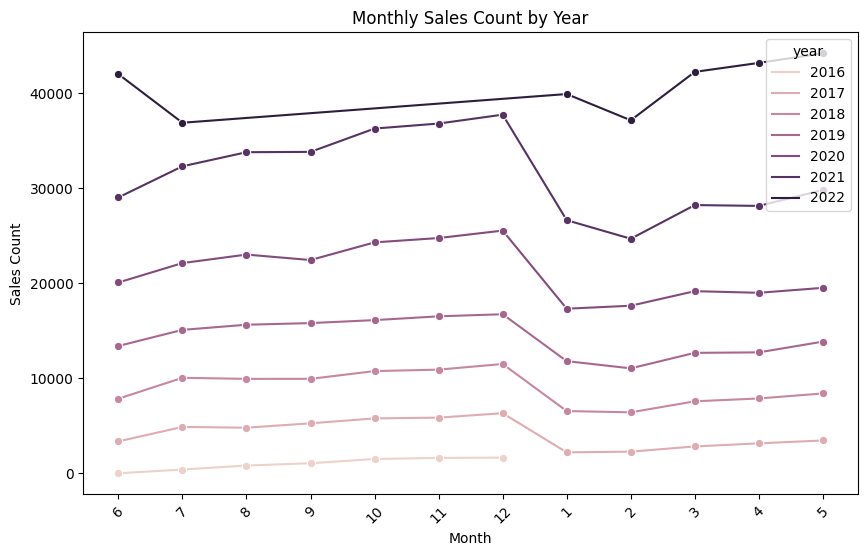

In [ ]:
# 월 추출

#x축에 전체 월 표시하기 위해 month str타입으로 변경
#month 가 int인 경우, seaborn 자체적으로 짝수월만 프린트 해버릴 수 있음.
transaction_df['month'] = transaction_df['created_at'].dt.month

# 연도와 월별 총 구입 건수

year_month_total_sales = transaction_df.groupby(['year', 'month']).size().reset_index()
year_month_total_sales.columns = ['year', 'month', 'sales_cnt']
year_month_total_sales.month = year_month_total_sales.month.astype(str)


plt.figure(figsize=(10, 6))
sns.lineplot(data=year_month_total_sales, x="month", y="sales_cnt", hue="year", marker='o')
plt.title('Monthly Sales Count by Year')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
## [연도에 따른 월 별 구매 건 수] 분석 결과

# sales count가 낮은 아래 -> 위 방향으로 16년 -> 22년 데이터가 겹치지 않고 쌓이는 그래프
# => 매년 sales count의 월 별 평균이 증가하고 있음을 알 수 있음

# 다만, 16년,22년 제외한 17~21년(12개월 데이터 보유한 연도) 그래프는 12월->1월 급격히 하락함.
# 6월 -> 7월은 22년도 제외 모두 상승하는 그래프이고, 22년도만 6->7월 그래프 급 하강 (checkpoint)
# 왜???


In [ ]:
pd.set_option('display.max_rows', None)

## 연도별 가장 판매량 높은 카테고리

In [ ]:
# 'id'를 'product_id'로 변경
product_df.rename(columns={'id': 'product_id'}, inplace=True)

# transaction 데이터와 product 데이터를 병합
data = pd.merge(transaction_df, product_df, on='product_id')

# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도와 카테고리로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory','subCategory','usage']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
idx = result.groupby(['year'])['quantity'].transform(max) == result['quantity']
most_sold = result[idx]

most_sold

,year,masterCategory,subCategory,usage,quantity,total_amount
49,2016,Apparel,Topwear,Casual,2698,2223355739
137,2017,Apparel,Topwear,Casual,18795,14919291933
244,2018,Apparel,Topwear,Casual,39573,32699420808
352,2019,Apparel,Topwear,Casual,62240,49005234032
462,2020,Apparel,Topwear,Casual,93927,75717095075
572,2021,Apparel,Topwear,Casual,138851,110468767716
682,2022,Apparel,Topwear,Casual,105119,83389614123


In [ ]:
# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도, 카테고리, 하위 카테고리, 용도로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
top5_categories = result.groupby('year').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)
top5_categories.head(10)


,year,masterCategory,quantity,total_amount
0,2016,Apparel,5108,4198229196
1,2016,Accessories,2813,2231727193
2,2016,Footwear,2061,1731769069
3,2016,Personal Care,586,405082870
4,2016,Free Items,39,25834904
5,2017,Apparel,35825,28307671620
6,2017,Accessories,19130,14851440678
7,2017,Footwear,15308,12263337692
8,2017,Personal Care,4143,3310991217
9,2017,Free Items,171,136834610


In [ ]:
## [연도에 따른 가장 많이 판매 된 주카테고리-부카테고리 별 총 매출과 구매횟수] 분석 결과

# 모든 연도 별 best cateory는 Apparel - Topwear - Casual
# 연도 별 인기카테고리 top5 (매년 동일함) :  Apparel > Accessories > Footwear > Personal Care >	Free Items

In [ ]:
print(data['created_at'].dt.tz)
data['created_at'] = data['created_at'].dt.tz_convert(None)

UTC


## RFM분석

In [ ]:
combined_df.head(1)

,customer_id,booking_id,sales,created_at
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,174717,2020-05-31 05:45:52.844494+00:00


In [ ]:
# 'created_at' 시간제거
#combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])
combined_df['created_at'] = combined_df['created_at'].dt.tz_convert(None)


# 현재 날짜 설정
# snapshot_date : RFM 분석을 수행하는 현재 날짜(분석의 기준점)
snapshot_date = pd.to_datetime("2022-08-01")

# Recency 계산: 오늘 날짜 - 가장 최근 구매 날짜
rfm_df = combined_df.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days,
    'booking_id': 'nunique', # 만약 중복값 처리 안하고 싶다면 'count' #기준: 'booking_id'가 한 건의 주문에 여러 개의 제품이 포함된 경우로, 한번의 이벤트로 본다면 nunique
    'sales': 'sum'
})

# 컬럼 이름 변경
rfm_df.rename(columns={
    'created_at': 'Recency',
    'booking_id': 'Frequency',
    'sales': 'Monetary'
}, inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
customer_id,,,
3,35,51,45347098
8,77,7,4703601
9,64,6,4068630
11,146,1,182533
15,207,5,6357246


In [ ]:
rfm_df.info() # 전체고객 중 transcation 데이터가 있는 50699명에 대한 rfm분석

<class 'pandas.core.frame.DataFrame'>
Index: 50704 entries, 3 to 99999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    50704 non-null  int64
 1   Frequency  50704 non-null  int64
 2   Monetary   50704 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [ ]:
rfm_df.describe().round(3)

,Recency,Frequency,Monetary
count,50704.00,50704.00,50704.00
mean,299.08,16.82,29008441.75
std,436.19,29.71,63915319.52
min,0.00,1.00,21270.00
25%,39.00,2.00,883762.00
50%,110.00,6.00,5056866.00
75%,359.00,18.00,26630627.00
max,2221.00,550.00,1110167254.00


In [ ]:
# high_rfm 고객 수 구하기
# high 의 기준은 각각 변경 가능
high_Recency = (rfm_df['Recency'] <= 28).sum() # 우리 팀이 정한 구매에 관한 이탈 기준(28일) 이내에 구매한 고객 수 확인
high_Frequency = (rfm_df['Frequency'] >= 24.74).sum() # Frequency 평균 이상의 고객 수 (값이 클수록 자주 구매한 것)
high_Monetary = (rfm_df['Monetary'] >= 29235474.19).sum() # Monetary 평균 이상의 고객 수 (값이 클수록 더 많은 금액을 지출한 것)

print('Recency 30일 이내에 구매한 고객 수:', high_Recency)
print('Frequency 평균 이상의 고객 수:', high_Frequency)
print('Monetary 평균 이상의 고객 수:', high_Monetary)

Recency 30일 이내에 구매한 고객 수: 9626
Frequency 평균 이상의 고객 수: 9805
Monetary 평균 이상의 고객 수: 11955


In [ ]:
# high_Recency, high_Frequency, high_Monetary 모두에 속한 고객 추출
high_RFM_customers = rfm_df[(rfm_df['Recency'] <= 30) & (rfm_df['Frequency'] >= 24.74) & (rfm_df['Monetary'] >= 29235474.19)]

# 해당 고객들의 customer_id 추출
high_RFM_customer_ids = high_RFM_customers.index
high_RFM_customer_ids

Index([   20,    76,   107,   121,   126,   142,   155,   173,   177,   198,
       ...
       99828, 99829, 99837, 99843, 99915, 99935, 99976, 99986, 99988, 99995],
      dtype='int64', name='customer_id', length=4816)

In [ ]:
## [RFM분석] 분석 결과

# Recency 30일 이내에 구매한 고객 수: 10223
# Frequency 평균 이상의 고객 수: 9805
# Monetary 평균 이상의 고객 수: 12037
# 위 3가지 지표에 모두 속하여, high_RFM_customer로 분류 된 고객 수 : 4837 (=그렇다면, 이들을 충성도가 매우 높은 고객이라고 볼 수 있는가?)

# high_RFM_customer에 대한 추가 분석 필요 여부 논의 (checkpoint)

## age segment

In [ ]:
# 연령 구간 설정

bins = [0, 14, 20, 25, 30, 35, float('inf')]
# float('inf')는 무한대를 의미하며, 이를 이용해 36세 이상을 모두 포함합니다.

# 각 연령 구간에 대한 레이블 설정
labels = ['non-target minor(0-14)', 'minor(15-20)', 'Early 20s(21-25)', 'Late 20s(26-30)', 'Early 30s(31-35)', 'non-target adults(36-)']

# cut 함수를 이용해 'age_group' 컬럼 생성
customer_df['age_segment'] = pd.cut(customer_df['age_now'], bins=bins, labels=labels)
customer_df['age_segment'].value_counts()

age_segment
Early 20s(21-25)          26766
Late 20s(26-30)           24974
minor(15-20)              18324
Early 30s(31-35)          15638
non-target adults(36-)    11442
non-target minor(0-14)     2855
Name: count, dtype: int64

In [ ]:
# 'transaction_df'와 'customer_df' 머지
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity'] - trans_cust_df['promo_amount'])

# 'age_segment'에 따른 매출액 및 판매횟수 총합 계산
age_segment_sales = trans_cust_df.groupby('age_segment').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_segment_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)
age_segment_sales['seg_transaction'] =  age_segment_sales['total_sales'] / age_segment_sales['sales_count']
age_segment_sales

,age_segment,total_sales,sales_count,seg_transaction
0,non-target minor(0-14),14215119176,38723,367097.57
1,minor(15-20),87891742866,238251,368903.98
2,Early 20s(21-25),122043092510,333633,365800.42
3,Late 20s(26-30),113559014027,309665,366715.69
4,Early 30s(31-35),70705108206,192831,366668.78
5,non-target adults(36-),51772196250,141475,365945.90


## RFM(age segment)

In [ ]:
# 'transaction_df', 'customer_df' 머지
rfm_data = pd.merge(combined_df, customer_df, on='customer_id')

# 'created_at' datetime 타입 변환
rfm_data['created_at'] = rfm_data['created_at'].dt.tz_localize(None)

# Recency 계산: snapshot_date - 모든 구매 날짜
rfm_data['Recency'] = (snapshot_date - rfm_data['created_at']).dt.days

# 성별과 연령 세그먼트 별 평균 Recency, Frequency, Monetary 계산
rfm_df = rfm_data.groupby(['gender', 'age_segment']).agg({
    'Recency': 'mean',
    'booking_id': 'nunique',#booking_id 유니크값
    'sales': 'sum'
})

rfm_df.rename(columns={
    'booking_id': 'Frequency',
    'sales': 'Monetary'
}, inplace=True)

rfm_df


Recency  Frequency      Monetary
gender age_segment                                             
F      non-target minor(0-14)   668.94      18011   31095487154
       minor(15-20)             648.22     101800  179413332326
       Early 20s(21-25)         655.92     144268  247052307737
       Late 20s(26-30)          641.36     133677  231512120148
       Early 30s(31-35)         646.60      85189  146372420043
       non-target adults(36-)   640.59      60564  104005459273
M      non-target minor(0-14)   643.02       8308   14051785407
       minor(15-20)             676.67      59687  104145397606
       Early 20s(21-25)         670.92      82037  143653587830
       Late 20s(26-30)          662.36      77098  130168113345
       Early 30s(31-35)         639.77      46131   78573599407
       non-target adults(36-)   661.60      35812   60800420451

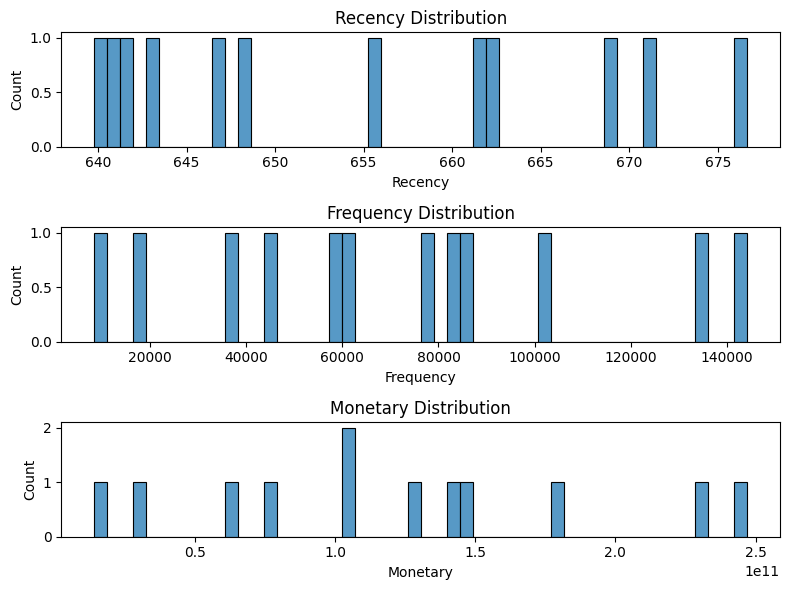

In [ ]:
# Recency, Frequency, Monetary 값의 분포를 확인하기 위한 히스토그램 생성
plt.figure(figsize=(8,6))

plt.subplot(3, 1, 1)
sns.histplot(rfm_df['Recency'], bins=50)
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(rfm_df['Frequency'], bins=50)
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(rfm_df['Monetary'], bins=50)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

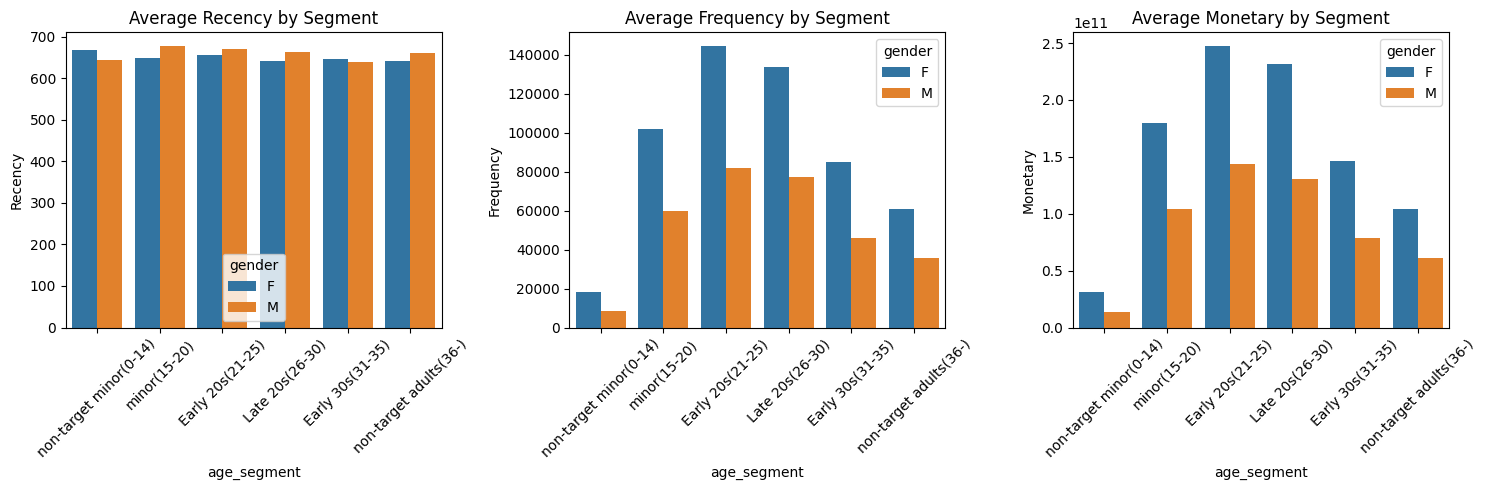

In [ ]:
# 데이터프레임 리셋 (멀티 인덱스를 컬럼으로 변경)
rfm_df_reset = rfm_df.reset_index()

# 성별에 따른 각 세그먼트의 Recency, Frequency, Monetary 평균 값 시각화
plt.figure(figsize=(15,5))

# Recency
plt.subplot(1, 3, 1)
sns.barplot(x='age_segment', y='Recency', hue='gender', data=rfm_df_reset)
plt.title('Average Recency by Segment')
plt.xticks(rotation=45)

# Frequency
plt.subplot(1, 3, 2)
sns.barplot(x='age_segment', y='Frequency', hue='gender', data=rfm_df_reset)
plt.title('Average Frequency by Segment')
plt.xticks(rotation=45)

# Monetary
plt.subplot(1, 3, 3)
sns.barplot(x='age_segment', y='Monetary', hue='gender', data=rfm_df_reset)
plt.title('Average Monetary by Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## RFM(age segment)_최근2개월

In [ ]:
rfm_data.columns

Index(['customer_id', 'booking_id', 'sales', 'created_at', 'gender',
       'birthdate', 'home_location', 'first_join_date', 'age_join', 'age_now',
       'age_segment', 'Recency'],
      dtype='object')

In [ ]:
# 'created_at'를 datetime 타입으로 변환
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])

# 현재 날짜 설정
snapshot_date = pd.to_datetime("2022-08-01")

# Recency, Frequency, Monetary 계산
rfm_data = combined_df.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days,
    'booking_id': 'nunique',
    'sales': 'sum'
})

rfm_data.rename(columns={
    'created_at': 'Recency',
    'booking_id': 'Frequency',
    'sales': 'Monetary'
}, inplace=True)

# RFM 점수 계산
rfm_data['Recency_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=list(range(4, 0, -1)))
rfm_data['Frequency_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=list(range(1, 5)))
rfm_data['Monetary_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=list(range(1, 5)))

# RFM 점수를 기반으로 고객 세분화
rfm_data['RFM_Segment'] = rfm_data['Recency_Score'].astype(str) + rfm_data['Frequency_Score'].astype(str) + rfm_data['Monetary_Score'].astype(str)

# 데이터프레임 병합
rfm_segment_data = pd.merge(combined_df, rfm_data['RFM_Segment'], on='customer_id')

# 세그먼트별 매출 추이 분석
rfm_segment_summary = rfm_segment_data.groupby('RFM_Segment').agg({
    'customer_id': 'nunique',
    'sales': 'sum'
}).rename(columns={'customer_id': 'Customer_Count'})

rfm_segment_summary.sort_values(by='sales', ascending=False, inplace=True)

print(rfm_segment_summary)



             Customer_Count         sales
RFM_Segment                              
444                    6554  756457800021
344                    3028  316737546612
334                     985   60706556938
434                     652   42467098824
234                     614   40081866970
333                    2744   33061026879
443                    1440   25273436700
343                    1428   24154396154
233                    1999   22992290493
433                    1737   21250198610
224                     303   18594838619
223                    1169   12996341588
114                     155    8659074972
324                     125    7570033578
222                    3047    6754187629
113                     612    6749205507
323                     529    5871509252
124                     102    5816548626
244                      17    5490763069
123                     388    4352812958
232                    1224    4114819180
112                    2030    409

In [ ]:
# 'created_at'를 datetime 타입으로 변환
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])

# 현재 날짜 설정
snapshot_date = pd.to_datetime("2022-08-01")

# Recency, Frequency, Monetary 계산
rfm_df = data.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days,
    'booking_id': 'count',
    'total_amount': 'sum'
}).reset_index()

rfm_df.rename(columns={
    'created_at': 'Recency',
    'booking_id': 'Frequency',
    'total_amount': 'Monetary'
}, inplace=True)

# RFM 점수 계산
rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=list(range(4, 0, -1)))
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=list(range(1, 5)))
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=list(range(1, 5)))

# RFM 점수를 기반으로 고객 세분화
rfm_df['RFM_Segment'] = rfm_df['Recency_Score'].astype(str) + rfm_df['Frequency_Score'].astype(str) + rfm_df['Monetary_Score'].astype(str)

# 세그먼트별 매출 추이 분석
rfm_segment_summary = rfm_df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Customer_Count'})

rfm_segment_summary.sort_values(by='Monetary', ascending=False, inplace=True)

print(rfm_segment_summary)


             Recency  Frequency     Monetary  Customer_Count
RFM_Segment                                                 
144           423.50      30.00 175038382.00               2
244           145.16      53.09 135351814.94             197
444            17.79      92.38 115292293.49            6834
344            59.05      74.52 103015992.60            3456
134           720.46      13.50  58730644.26             222
234           189.23      18.90  52542911.41             773
434            20.21      21.71  47287109.42             448
334            74.07      21.10  45793327.79             693
224           194.15       7.38  43231866.08              13
424             4.67       7.33  36825152.67               3
324            93.33       7.00  36114211.00               3
124           799.19       6.97  33719374.23              31
243           119.00      28.67  23016524.67               6
443            20.45      36.55  20179808.96            1016
343            60.25    

In [ ]:
# Recency, Frequency, Monetary 점수를 2개의 그룹으로 나눔
rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 2, labels=[1, 2])
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 2, labels=[1, 2])
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 2, labels=[1, 2])

# RFM 점수를 기반으로 고객 세분화
rfm_df['RFM_Segment'] = rfm_df['Recency_Score'].astype(str) + rfm_df['Frequency_Score'].astype(str) + rfm_df['Monetary_Score'].astype(str)

# 세그먼트별 매출 추이 분석
rfm_segment_summary = rfm_df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Customer_Count'})

rfm_segment_summary.sort_values(by='Monetary', ascending=False, inplace=True)

rfm_segment_summary


,Recency,Frequency,Monetary,Customer_Count
RFM_Segment,,,,
122,39.74,56.51,68107573.76,19206
222,225.36,16.59,28807942.75,4043
212,514.36,6.09,10024801.31,1601
112,54.63,6.80,8670613.59,499
121,52.36,11.15,3893001.15,1210
221,171.25,10.46,3867197.06,775
111,54.11,4.13,1743766.17,4526
211,647.30,2.55,1121457.63,18839


In [ ]:
rfm_df.head(1)

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment
0,3,35,71,45842098,1,2,2,122


In [ ]:
# 예를 들어, RFM_Segment가 '122'인 고객들의 ID를 얻고 싶다면:
segment_122_customers = rfm_df[rfm_df['RFM_Segment'] == '122']['customer_id']


# 이렇게 얻은 segment_122_customers는 '122' 세그먼트에 속한 고객들의 ID를 포함하는 pandas Series 객체입니다.

In [ ]:
# 'customer_id'를 기준으로 'RFM_Segment' 정보 추가
customer_df2 = customer_df.merge(rfm_df[['customer_id', 'RFM_Segment']], on='customer_id', how='left')
customer_df2.head()


customer_df2.to_csv('customer_add_rfm.csv', index=False)


In [ ]:
# customer_df와 rfm_df 병합
rfm_customer_df = rfm_df.merge(customer_df, on='customer_id')

# RFM_Segment별 age_segment 빈도 계산
age_segment_distribution = rfm_customer_df.groupby('RFM_Segment')['age_segment'].value_counts().unstack()
age_segment_distribution['total_count'] = age_segment_distribution.sum(axis='columns')

age_segment_distribution

age_segment,non-target minor(0-14),minor(15-20),Early 20s(21-25),Late 20s(26-30),Early 30s(31-35),non-target adults(36-),total_count
RFM_Segment,,,,,,,
111,124,807,1239,1157,692,507,4526
112,18,94,127,125,78,57,499
121,36,205,325,328,180,136,1210
122,578,3565,5122,4764,3006,2171,19206
211,531,3457,4963,4633,3074,2181,18839
212,44,294,453,389,253,168,1601
221,17,129,225,195,120,89,775
222,101,722,1078,1052,627,463,4043


In [ ]:
age_segment_distribution['total_count'].sum()

50699

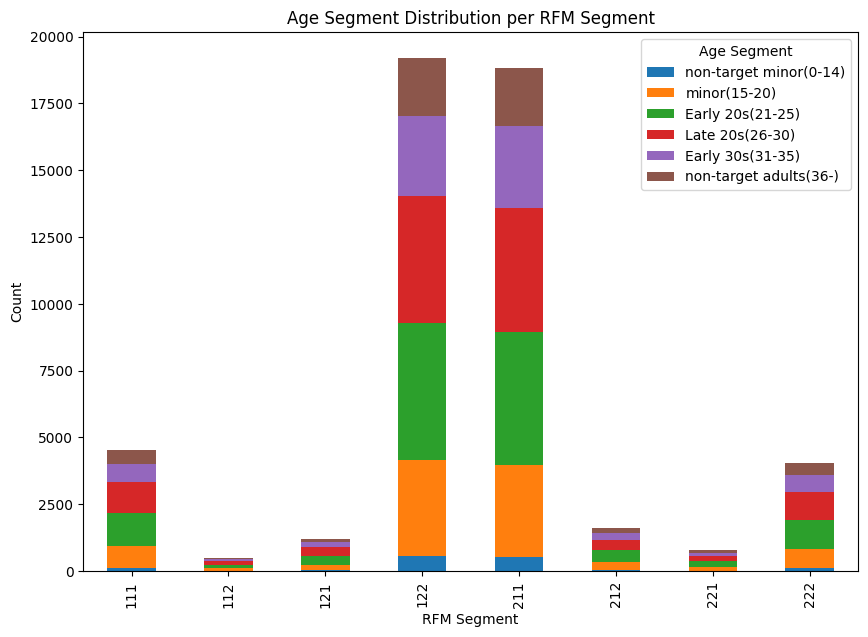

In [ ]:
# 시각화
age_segment_distribution.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Age Segment Distribution per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.legend(title='Age Segment')

plt.show()


In [ ]:
# RFM_Segment별 gender 빈도
rfm_gender_distribution = rfm_customer_df.groupby('RFM_Segment')['gender'].value_counts().unstack()

print(rfm_gender_distribution)
print('-----------------------------')
print(rfm_gender_distribution.describe())

gender           F     M
RFM_Segment             
111           2934  1592
112            327   172
121            785   425
122          12297  6909
211          12061  6778
212           1043   558
221            503   272
222           2594  1449
-----------------------------
gender        F       M
count      8.00    8.00
mean    4068.00 2269.38
std     5094.76 2871.15
min      327.00  172.00
25%      714.50  386.75
50%     1818.50 1003.50
75%     5215.75 2888.50
max    12297.00 6909.00


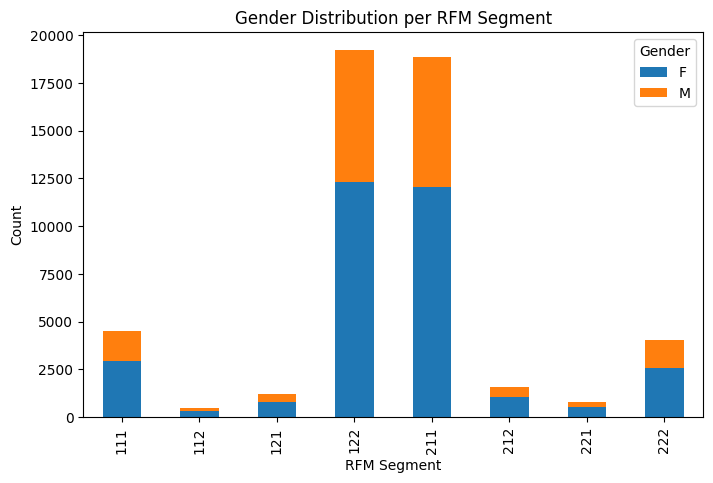

In [ ]:
rfm_gender_distribution.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title('Gender Distribution per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()


### RFM점수별 SEG 설명


### RFM점수별 SEG
<RFM점수 별 segment 설명>
111 : 최근성 ↓, 구매횟수 ↓, 구매금액 ↓ : 위험! 잠재적으로 이탈하는 고객
112 : 최근성 ↓, 구매횟수 ↓, 구매금액 ↑ : 덜 자주 구매하지만, 구매 시 큰 금액을 지출하는 경향 => 구매 유도하는 프로모션 필요
121 : 최근성 ↓, 구매횟수 ↑, 구매금액 ↓ : 최근 구매하지 않았지만, 구매 횟수가 높고, 구매금액은 낮음 = > 재구매 유도
122 : 최근성 ↓, 구매횟수 ↑, 구매금액 ↑ : 최근 구매하지 않았지만, 과거 높은 빈도로 많은 금액을 구매했던 고객 => 잠자는 고객(활성화 필요!) => 재방문 유도(특별 할인, 개별 특성에 따른 프로모션 제안)
211 : 최근성 ↑, 구매횟수 ↓, 구매금액 ↓ : 최근 구매, 구매 빈도와 구매금액이 낮음 => 재구매 및 더 자주 구매하도록 유도
212 : 최근성 ↑, 구매횟수 ↓, 구매금액 ↑ : 최근 구매, 구매금액도 높지만, 구매 빈도가 낮음 => 잠재력 있는 고객 => 사이트 자주 방문하도록 유도(새 제품 출시 정보, 인기제품 추천 등)
221 : 최근성 ↑, 구매횟수 ↑, 구매금액 ↓ : 최근 구매, 구매 빈도 높으나 구매금액이 낮음 => 돈 더 많이 쓰게 유도 (고가제품 추천or 더 많은 제품 사도록 유도)
222 : 최근성 ↑, 구매횟수 ↑, 구매금액 ↑ : 최근 구매, 구매 빈도, 금액 모두 높음 => 가장 가치있는 고객군! => 최우선 집중하고, 이들의 만족도 높이는 서비스 제공하기!

In [ ]:
# 가장 가치 있는 고객 세그먼트:  '122', '222'
# => 각각 평균 68107573.76원, 28807942.75원 지출 => 전체 고객 중에서 가장 높은 구매 금액
# => 특히 '122' 는 구매 빈도도 56.51로 가장 높음 => 가장 가치 있는 고객으로 분류 => 이들의 만족도를 높이고 이탈을 방지하기 위해 최우선적으로 집중

# 잠재적으로 이탈 위험 있는 고객 세그먼트: '211' =>
# => 최근성이 647.30으로 가장 높고, 구매 빈도와 구매 금액이 상당히 낮음
# => 장기간 동안 재구매를 하지 않았음 => 이들 고객들은 잠재적으로 이탈 위험이 있는 고객으로 분류가능
# => 이들을 대상으로 재구매를 유도하는 마케팅 전략 수립 필요

# 잠재력 있는 고객 세그먼트: '212'
# => 최근에 구매를 했지만(최근성 514.36), 구매 빈도 상대적으로 낮고, 구매 금액은 높은 편
# => 고객들이 잠재적으로 높은 가치를 가진 고객일 수 있음을 시사
# => 이들 고객을 대상으로 구매 빈도를 높이는 마케팅 전략을 수립 필요

In [ ]:
# RFM_Segment별 RFM 평균 계산
rfm_segment_analysis = rfm_customer_df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
})

rfm_segment_analysis


,Recency,Frequency,Monetary
RFM_Segment,,,
111,54.11,4.13,1743766.17
112,54.63,6.80,8670613.59
121,52.36,11.15,3893001.15
122,39.74,56.51,68107573.76
211,647.30,2.55,1121457.63
212,514.36,6.09,10024801.31
221,171.25,10.46,3867197.06
222,225.36,16.59,28807942.75


In [ ]:
rfm_segment_analysis.describe()

,Recency,Frequency,Monetary
count,8.00,8.00,8.00
mean,219.89,14.29,15779544.18
std,235.16,17.63,22949236.82
min,39.74,2.55,1121457.63
25%,53.67,5.60,3336339.33
50%,112.94,8.63,6281807.37
75%,297.61,12.51,14720586.67
max,647.30,56.51,68107573.76


In [ ]:
buy_split_book = pd.read_csv('C:/Users/lovel/Desktop/tp2/df_buy_split_book.csv')
#buy_split_book= buy_split_book.customer_id.astype(int)
buy_split_book.head(1)

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id
0,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,50.00,NaN,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca


In [ ]:
# 'customer_id' 기준으로 병합
bsb_cust_df = pd.merge(buy_split_book, customer_df, on='customer_id', how='left')

# 'RFM_Segment'와 'event_name'에 따른 세션 수
session_counts = bsb_cust_df.groupby(['RFM_Segment', 'event_name'])['session_id'].count().reset_index()

# 각 'RFM_Segment'별로 전체 세션 수
total_sessions_per_segment = session_counts.groupby('RFM_Segment')['session_id'].sum()

# 'RFM_Segment'별로 'booking' 이벤트 세션 수
booking_sessions_per_segment = session_counts[session_counts['event_name'] == 'BOOKING'].set_index('RFM_Segment')['session_id']

# 'booking' 이벤트 세션 수/ 전체 세션 수 => 구매 세션 비율
purchase_session_ratio = (booking_sessions_per_segment / total_sessions_per_segment).reset_index()
purchase_session_ratio.columns = ['RFM_Segment', 'Purchase_Session_Ratio']


In [ ]:
total_sessions_per_segment

RFM_Segment
111.00      213001
112.00       27258
121.00      158975
122.00    10963121
211.00      488195
212.00       60384
221.00       85569
222.00      466462
Name: session_id, dtype: int64

In [ ]:
def calculate_booking_ratio(row):
    # 세션 ID 중복 제거
    unique_sessions = row['session_id'].nunique()

    # 'event_name'이 'BOOKING'인 세션의 수를 세기
    booking_sessions = row[row['event_name'] == 'BOOKING']['session_id'].nunique()

    return booking_sessions / unique_sessions if unique_sessions != 0 else 0

# 'RFM_Segment'를 기준으로 그룹화하고, 각 그룹에 'calculate_booking_ratio' 함수 적용
purchase_session_ratio = bsb_cust_df.groupby('RFM_Segment').apply(calculate_booking_ratio).reset_index()
purchase_session_ratio.columns = ['RFM_Segment', 'Purchase_Session_Ratio']


In [ ]:
bsb_cust_df.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,...,old_session,booking_id,gender,birthdate,home_location,first_join_date,age_join,age_now,age_segment,RFM_Segment
0,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,...,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca,F,2000-07-12,Jawa Barat,2016-10-09,16,22,Early 20s(21-25),212.00
1,44122af0-0bf5-407b-b3ff-22c082c61426,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.00,1,255356,NaN,NaN,0.00,...,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca,F,2000-07-12,Jawa Barat,2016-10-09,16,22,Early 20s(21-25),212.00
2,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,...,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca,F,2000-07-12,Jawa Barat,2016-10-09,16,22,Early 20s(21-25),212.00
3,44122af0-0bf5-407b-b3ff-22c082c61426,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,...,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca,F,2000-07-12,Jawa Barat,2016-10-09,16,22,Early 20s(21-25),212.00
4,44122af0-0bf5-407b-b3ff-22c082c61426,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,...,44122af0-0bf5-407b-b3ff-22c082c61426,097c5406-68c5-4ecc-8399-8745cb3ff0ca,F,2000-07-12,Jawa Barat,2016-10-09,16,22,Early 20s(21-25),212.00


In [ ]:
bsb_cust_df.event_name.value_counts()

event_name
CLICK          2410327
HOMEPAGE       2406144
ADD_TO_CART    1894531
SCROLL         1608635
ITEM_DETAIL    1251787
SEARCH         1134598
BOOKING         852582
PROMO_PAGE      577865
ADD_PROMO       326535
Name: count, dtype: int64

In [ ]:
purchase_session_ratio

,RFM_Segment,Purchase_Session_Ratio
0,111.00,0.13
1,112.00,0.12
2,121.00,0.10
3,122.00,0.09
4,211.00,0.16
5,212.00,0.13
6,221.00,0.11
7,222.00,0.10


In [ ]:
buy_split_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463004 entries, 0 to 12463003
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
 11  customer_id      float64
 12  quarter          float64
 13  old_session      object 
 14  booking_id       object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.4+ GB


## 월별 고객수 변화(rfm점수에 따른 segment)

## 연도별 유입 고객 수

In [ ]:
# 'first_join_date' 컬럼을 datetime 타입으로 변환
customer_df['first_join_date'] = pd.to_datetime(customer_df['first_join_date'])

# 'first_join_date'에서 연도 추출
customer_df['join_year'] = customer_df['first_join_date'].dt.year

# 연도별 유입 고객 수 계산
new_customers_by_year = customer_df['join_year'].value_counts().sort_index()
new_customers_by_year

join_year
2016     4729
2017    11440
2018    13587
2019    15303
2020    17821
2021    22759
2022    14360
Name: count, dtype: int64

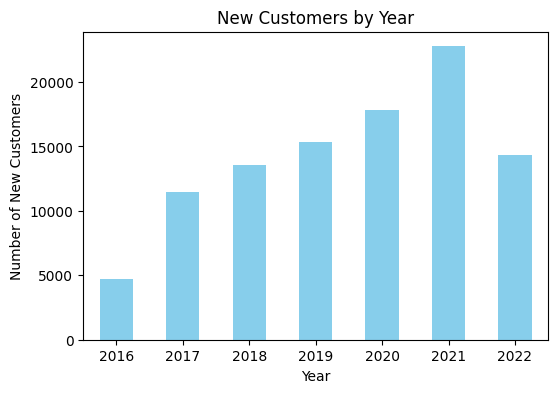

In [ ]:
# 연도별 유입 고객 수 시각화
plt.figure(figsize=(6,4))
new_customers_by_year.plot(kind='bar', color='skyblue')
plt.title('New Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## [연도별 유입 고객 수] 분석 결과

# 2021년까지 꾸준히 성장
# 2016, 2022년은 전체 월에 대한 데이터가 없음(일부만 있어서?)

## 매년 월별 유입 고객 수

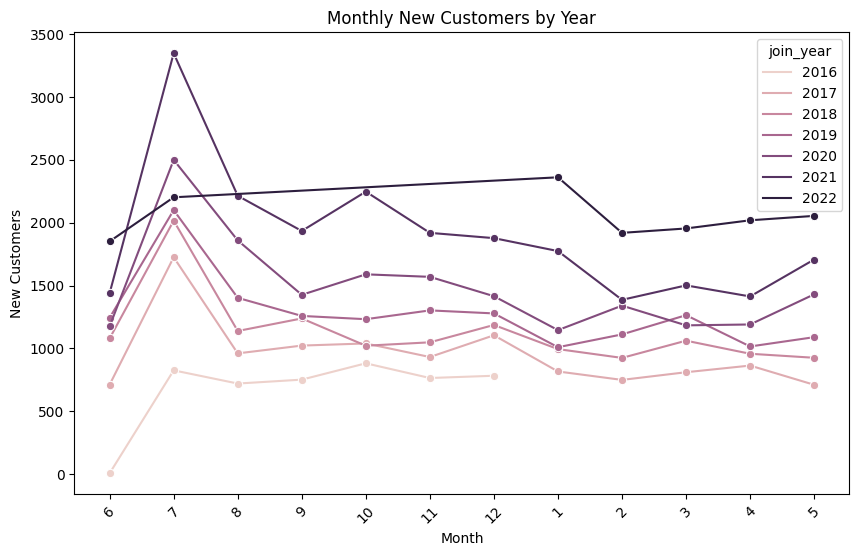

In [ ]:
# 'first_join_date'에서 연도와 월 추출
customer_df['join_year'] = customer_df['first_join_date'].dt.year
customer_df['join_month'] = customer_df['first_join_date'].dt.month

# 연도와 월별 유입 고객 수 계산
new_customers_by_year_month = customer_df.groupby(['join_year', 'join_month']).size().reset_index()
new_customers_by_year_month.columns = ['join_year', 'join_month', 'new_customers']

# 월을 문자열 데이터로 변환(전체 월을 표시하기 위해)
new_customers_by_year_month['join_month'] = new_customers_by_year_month['join_month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_customers_by_year_month, x="join_month", y="new_customers", hue="join_year", marker='o')
plt.title('Monthly New Customers by Year')
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.xticks(rotation=45)
plt.show()



In [ ]:
new_customers_by_year_month.head(24)

,join_year,join_month,new_customers
0,2016,6,6
1,2016,7,825
2,2016,8,720
3,2016,9,751
4,2016,10,881
5,2016,11,764
6,2016,12,782
7,2017,1,816
8,2017,2,749
9,2017,3,810


In [ ]:
earliest_date = customer_df['first_join_date'].min()
earliest_date


Timestamp('2016-06-30 00:00:00')

## 구매건당 매출(평균주문가치(AOV))

### 건별 객단가

In [ ]:
# 평균 주문 가치(Average Order Value, AOV)
# 전체 매출/전체 주문 건수  => 고객 한 명이 한 번의 구매로 얼마나 많은 돈을 소비하는지에 대한 지표

# 총 매출 계산
total_sales = trans_sales_df.sales.sum()

# 총 구매 건수 계산
total_orders = transaction_df['booking_id'].nunique()

# 구매 건 당 매출액 계산
revenue_per_order = total_sales / total_orders
revenue_per_order.round(2)

# 1725164.3 루피아 = 147,017원

1725164.3

In [ ]:
# # 각 구매 건(booking_id) 별 매출액 =  sales['sales']
sales.sales.describe()

count     852582.00
mean      540725.92
std       815314.61
min         7515.00
25%       194792.25
50%       293559.00
75%       505044.25
max     23494487.00
Name: sales, dtype: float64

In [ ]:
# 평균 주문 가치(AOV):  한 번의 구매에서 고객이 얼마나 많은 돈을 쓰는지에 대한 평균
# => 고객의 구매력 및 의사결정에 대한 인사이트
# => 높은 AOV =  고객들이 한 번의 구매에 많은 돈을 쓰고 있다는 것을 의미

# 평균 매출액: 각 거래에 대한 평균 매출
# => 판매된 제품 가격 범위 및 판매량에 대한 인사이트
# => 낮은 평균 매출액 = 각 거래에서 매출이 낮다는 것을 의미 OR 비교적 저렴한 제품이 더 많이 팔렸음을 의미

In [ ]:
## [구매 건 당 매출(평균 주문 가치(Average Order Value, AOV))] 분석 결과

# AOV = revenue_per_order = 고객이 한번의 거래에서 지출하는 평균 금액 = 1725164.3루피아  = 147,017원

# 매출액의 분포: 표준 편차(std) =  815,314.61 => 매출액이 평균과 격차가 큰 경우가 많음
# => 구매 패턴에 큰 차이가 있을 수 있음을 시사 => 어떤 고객은 대량 구매 또는 더 비싼 제품을 구매하는 반면, 다른 고객은 적은 수량의 제품이나, 더 저렴한 제품을 구매

# # 사분위수: 중앙값(50% 분위수)= 293,559 => 평균보다 훨씬 낮음
# =>  매출 데이터가 오른쪽으로 많이 치우쳐져 있고, 매우 큰 매출액을 가진 거래가 있음을 시사
# =>  그리고, 대부분의 거래는 작은 매출액이고, 소수의 거래가 매우 큰 매출액을 가지는 롱테일 분포를 갖는다는 것을 시사

# 최대 매출액: 23,494,487로 => 평균이나 중앙값에 비해 훨씬 높음
# => 몇몇 고객이 대량의 제품을 구매하거나, 매우 비싼 제품을 구매하여 높은 매출을 창출했음을 의미



### 고객별 객단가

In [ ]:
# 고객별 총 매출액
customer_total_sales = sales.groupby('customer_id')['sales'].sum()

# 고객별 주문 수
customer_total_orders = transaction_df.groupby('customer_id')['booking_id'].nunique()

# 객단가 계산 : 한 고객이 한번 주문할 때의 평균 금액
average_sales_per_order = customer_total_sales / customer_total_orders

# 고객별 총 매출액 출력
customer_total_sales_df = customer_total_sales.to_frame()

# 고객별 총 주문 수 출력
customer_total_orders_df = customer_total_orders.to_frame()

# 객단가 출력
average_sales_per_order_df = average_sales_per_order.to_frame()
average_sales_per_order_df.rename(columns={0:'객단가'}, inplace=True)

In [ ]:
# 위의 세 프레임 병합

merged_df = pd.merge(customer_total_sales_df, customer_total_orders_df, on='customer_id')
merged_df = pd.merge(merged_df, average_sales_per_order_df, on='customer_id')

# 컬럼명 재설정
merged_df.columns = ['Total_Sales', 'Total_Orders', 'Average_Sales_Per_Order']
merged_df.head()

,Total_Sales,Total_Orders,Average_Sales_Per_Order
customer_id,,,
3,20900889,51,409821.35
8,3853561,7,550508.71
9,2603665,6,433944.17
11,182533,1,182533.00
15,2084870,5,416974.00


In [ ]:
# merged_df와 rfm_df 병합 (customer_id 분포 동일)

# 'rfm_df'와 'merged_df' 병합
rfm_merged_df = pd.merge(rfm_df, merged_df, left_index=True, right_index=True)
rfm_merged_df.head()

# 컬럼명 재안내
# Recency: 거래의 최근성. 가장 최근에 구매한 날짜로부터 현재까지의 기간
# Frequency: 거래 빈도. 총 거래 횟수(=Total_Orders)
# Monetary: 거래 금액. 고객이 구매한 총 금액(=Total_Sales)
# Total_Sales : 고객이 구매한 총 금액 (=Monetary)
# Total_Orders: 거래 빈도. 총 거래 횟수(=Frequency)
# Average_Sales_Per_Orde : 고객의 1회 주문 시 평균 주문 금액

,Recency,Frequency,Monetary,Total_Sales,Total_Orders,Average_Sales_Per_Order
customer_id,,,,,,
3,35,51,45842098,20900889,51,409821.35
8,77,7,4758601,3853561,7,550508.71
9,64,6,4113630,2603665,6,433944.17
11,146,1,197533,182533,1,182533.00
15,207,5,6447246,2084870,5,416974.00


In [ ]:
# 출력형식 지정(소수점 둘째자리까지)
# (참고) mean 1703249 루피아 = 148,151원
pd.options.display.float_format = '{:.2f}'.format
average_sales_per_order.describe()

count      50704.00
mean      539222.90
std       459984.84
min        21270.00
25%       308642.94
50%       452283.38
75%       615188.54
max     13899505.00
dtype: float64

In [ ]:
# [고객별 객단가] 분석결과

# Total_Sales,	Total_Orders  :  rfm 분석 결과와 동일
# Average_Sales_Per_Order
# count       50705.00
# mean       539222.90 :  주문당 매출의 전체 평균
# std        459984.84 :  고객 별 주문금액의 편차가 큼
# min         21270.00
# 25%        308642.94
# 50%        452283.38 : 중앙값이 평균보다 조금 낮음 : 데이터에 높은 객단가를 가진 고객이 포함되어 있어서 평균이 올라갔을 수 있음을 시사
# 75%       615188.54
# max     13899505.00 : min 과 비교해보면, 고객별 주문금액의 차이가 매우 큼이 확인 됨(=일부 고객이 매우 고가의 제품을 구매하거나 대량으로 구매하고 있음)

# 매우 큰 표준편차(std), 평균보다 훨씬 작은 중앙값
# => 일부 고객은 평균보다 훨씬 더 높은 지출의 주문을 하고 있음을 의미
# => 우리에게 가치 있는 고객일 가능성이 높고, 붙잡을 필요 있음!  => 액션아이템 : 로열티 제공 등 설계 가능
# => 객단가 낮은 고객에게는 저렴한 제품 라인 추천 또는 구매 횟수 늘이기 위한 전략 수립 가능

### 연도별 객단가

In [ ]:
# 연도별 객단가
# created_at 컬럼 => datetime 형식으로 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 거래별 총 지출액 계산 (item_price * quantity)-promo_amount : 배송비 제외한 총 금액
transaction_df['total_spent'] = transaction_df['total_amount'] - transaction_df['promo_amount']

# 각 주문별 객단가 계산 (총 지출액 / 주문 횟수)
transaction_df['avg_sales_per_order'] = transaction_df.groupby('booking_id')['total_spent'].transform('sum') / transaction_df.groupby('booking_id')['booking_id'].transform('count')

# 연도별 평균 객단가 계산
avg_sales_per_order_year = transaction_df.groupby('year')['avg_sales_per_order'].mean()
avg_sales_per_order_year.to_frame()

,avg_sales_per_order
year,
2016,1218764.43
2017,1172499.25
2018,1195132.43
2019,1155368.98
2020,1190651.29
2021,1182601.81
2022,1174409.10


### 월별 객단가

In [ ]:
# 월별 객단가
# created_at 컬럼 => datetime 형식으로 변환
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])

# 월 추출
combined_df['month'] = combined_df['created_at'].dt.month

# sales
combined_df['total_spent'] = combined_df['sales']

# 객단가 계산 (총 지출액 / 주문 횟수)
combined_df['avg_sales_per_order'] = combined_df.groupby('booking_id')['total_spent'].transform('sum') / combined_df.groupby('customer_id')['booking_id'].nunique()

# 월별 평균 객단가 계산
avg_sales_per_order_month = combined_df.groupby('month')['avg_sales_per_order'].mean()
avg_sales_per_order_month.to_frame()

,avg_sales_per_order
month,
1,2901267.65
2,2997285.76
3,2546680.35
4,3157833.41
5,3213318.27
6,3269932.59
7,3664257.45
8,4085470.12
9,2650578.35


In [ ]:
import itertools

In [ ]:
trans_cust_df.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'total_amount', 'product_id', 'quantity', 'item_price',
       'with_promo', 'year', 'month', 'total_spent', 'avg_sales_per_order',
       'gender', 'birthdate', 'home_location', 'first_join_date', 'age_join',
       'age_now', 'join_year', 'join_month'],
      dtype='object')

In [ ]:
# 'created_at'를 datetime 타입으로 변환
trans_cust_df['created_at'] =trans_cust_df['created_at'].dt.tz_localize(None)

# 성별과 연령 세그먼트의 조합 리스트 생성
gender_age_list = list(itertools.product(trans_cust_df['gender'].unique(), trans_cust_df['age_segment'].unique()))

# 성별과 연령 세그먼트 별 RFM 데이터프레임을 저장할 딕셔너리 생성
rfm_dict = {}

for gender, age_segment in gender_age_list:
    # 성별과 연령 세그먼트에 따른 데이터 필터링
    segment_df = trans_cust_df[(trans_cust_df['gender'] == gender) & (trans_cust_df['age_segment'] == age_segment)]

    # RFM 분석 수행
    rfm = segment_df.groupby('customer_id').agg({
        'created_at': lambda x: (snapshot_date - x.max()).days,
        'booking_id': 'nunique',
        'total_amount': 'sum'
    })

    # 컬럼 이름 변경
    rfm.rename(columns={
        'created_at': 'Recency',
        'booking_id': 'Frequency',
        'total_amount': 'Monetary'
    }, inplace=True)

    # 결과 저장
    rfm_dict[(gender, age_segment)] = rfm



In [ ]:
# 각 성별과 연령 세그먼트에 따른 RFM 데이터프레임 출력
for (gender, age_segment), rfm in rfm_dict.items():
    print(f"Gender: {gender}, Age Segment: {age_segment}")
    print(rfm)
    print("\n")


Gender: M, Age Segment: non-target adults(36-)
             Recency  Frequency   Monetary
customer_id                               
3                 35         51   45842098
24                47         15   11519081
36               917          2    2634801
71                52         18   12460911
142               10         60   70017895
163              165          2    1180682
337              518          1     243909
361              125          8    7791884
365               44         22   12620392
375              130          4    9453970
403               73          6   13165793
490               51          6   40087510
572               65         12    4409526
574               37          5   11912357
670              284          4     763211
689              706          1    2678334
723              821          2    1518126
748               68         17    4572608
759             1874          1    2286936
791                3         42   69673765
837    